# Introduction

Hello! This is a personal project I have been working on for a few weeks now aimed to help me get more comfortable with conducting data analysis and get familiar with machine learning concepts using Python! This is a small personal project I have been working on for that very purpose in which I took sample data from an acapella club I am in and aim to use certain characteristics such as voice nasality, airiness, and someone's range into consideration to classify them into 5 different voice parts/classes:

* **Sopranos:** These singers typically sing higher notes, and are typically females
* **Altos:** These singers typically sing high-mid notes, and are also typically females.
* **Tenors:** These singers also typically sing middle notes, and are typically males, but may be female voices as well
* **Baritone:** These singers sing the middle to lower notes, and consist of male voices
* **Basses:** These singers sing the lowest notes, and consist of male voices

I took a randomly selected sample of some auditonee data that we have collected in the past, removed any key information about them (names, ages, emails, etc.) and generated a dataset that has been feature engineered to classify voice parts! 

##### Feature Engineering Portion:
To make this task easier, I had to feature engineer the auditionees range data. I did this by taking the auditionee's lowest note they could sing, and converted it into a MIDI note number as translated and shown in this article: https://newt.phys.unsw.edu.au/jw/notes.html
![MIDINoteClassificationConversion.png](MIDINoteClassificationConversion.png)
I did the same process for the auditionee's highest range note. This allowed the categorical data to be converted into numeric data to be easier to use during the classification process. 

I also included some other general info that we look for in the auditionee's tonal voice such as the nasality or airiness of their notes, in both their upper and lower ranges.

More information about how the individual variables are in the EDA section. 

# EDA

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('voiceData.csv')
df

,label,low_note,low_midi,high_note,high_midi,semitones,nasal_low,nasal_high,airy_low,airy_high,voice
0,C#4-B5,C#4,61,B5,83,22,3,3,0,0,soprano
1,E4-E6,E4,64,E6,88,24,2,2,3,2,soprano
2,C4-D#6,C4,60,D#6,87,27,1,2,3,1,soprano
3,D4-C6,D4,62,C6,84,22,1,3,0,2,soprano
4,D#4-A5,D#4,63,A5,81,18,3,3,3,0,soprano
...,...,...,...,...,...,...,...,...,...,...,...
73,A#2-D4,A#2,46,D4,62,16,2,0,0,0,baritone
74,G2-C#4,G2,43,C#4,61,18,1,3,3,1,bass
75,D2-C4,D2,38,C4,60,22,3,1,1,1,bass
76,D2-D4,D2,38,D4,62,24,2,3,2,3,bass


In [112]:
#checking for any missing values + data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       78 non-null     object
 1   low_note    78 non-null     object
 2   low_midi    78 non-null     int64 
 3   high_note   78 non-null     object
 4   high_midi   78 non-null     int64 
 5   semitones   78 non-null     int64 
 6   nasal_low   78 non-null     int64 
 7   nasal_high  78 non-null     int64 
 8   airy_low    78 non-null     int64 
 9   airy_high   78 non-null     int64 
 10  voice       78 non-null     object
dtypes: int64(7), object(4)
memory usage: 6.8+ KB


In [114]:
#checking how many of each class there are in this dataset
df['voice'].value_counts()

voice
alto        28
soprano     26
tenor       10
baritone    10
bass         4
Name: count, dtype: int64

### Variables & Basic Dataset Information:

* 78 rows = 78 auditionee data points
* 7 (int64) variables with 1 (object) classification variable
* No missing values -> this is because I purposefully curated this dataset as a sample from our records as a group, but normally if there are missing values there are several techniques you can use to deal with them.
  * People typically remove the NA rows
  * You can also input the average of the dataset into that value so you dont have to remove the row of data -> useful in smaller datasets
  * I think since this dataset is small as is, and that there are 5 classification categories, I would remove the row since adding the "average" value amongst 5 classifications can skew the model significantly. However, this depends on the classification class (for the smaller classes, I may choose to input the average of that class value)
* We can also see how many of each class/voice parts there are - there are very few tenors, baritones, and basses comparatively

##### **Variables:**
* **label:** This is the auditionee's raw range data as taken from the data I sampled from. This information was then seperated into the **low_note** and **high_note** data points, and then encoded into the **low_midi** and **high_midi** variables.
* **low_note:** This variable is the raw data representing the lowest note the auditionee can sing. This variable is then converted to the **low_midi** variable using the MIDI Note Number Scale as shown in the introduction.
* **low_midi:** This is a feature engineered variable. As mentioned above in the introduction, I took the auditionee's lowest note in their range, as shown by the **low_note** variable, used the MIDI Note Number Scale as shown in the image above, and converted it into a numeric value.
* **high_note:** This variable is the raw data representing the highesr note the auditionee can sing. This variable is then converted to the **high_midi** variable using the MIDI Note Number Scale as shown in the introduction.
* **low_midi:** This is a feature engineered variable. Similar to the low_midi variable, I took the auditionee's highest note from their range as shown by the **high_note** variable, used the MIDI Note Number Scale as shown in the image above, and converted it into a numeric value.
* **semitones:** This is the amount of notes/"half-steps" between the auditionee's highest and lowest note of their range
* **nasal_low:** This is how nasal the auditionee sounded in the lower part of their range. Singers typically want a lower level of nasality. This variable is seen on a scale of 0-3 in which 0 suggests the singer is not nasal at all, while 3 suggests that the singer has a very nasally tone. 
* **nasal_high:** Similar to the **nasal_low** variable, this is how nasal the auditionee sounded in their higher range. Again, typically a lower nasality is preferred. This variable is seen on a scale of 0-3 in which 0 suggests the singer is not nasal at all, while 3 suggests that the singer has a very nasally tone. 
* **airy_low:** This variable represents how airy the auditionee's tone is on the lower notes on a scale of 0-3 where a 0 suggests that the singer was not airy at all and a 3 suggests that the auditionee had a very airy tone
* **airy_high:** This variable represents how airy the auditionee's tone is on the higher notes on a scale of 0-3 where a 0 suggests that the singer was not airy at all and a 3 suggests that the auditionee had a very airy tone
* **voice:** This variable represents the 5 voice parts a singer can be put into and is part of the 5 classes of classification we will be using: sopranos, altos, tenors, baritones, and basses (more information about these classes/voice parts in the introduction)


### Comparing mean low_midi and high_midi by class/voice part

In [118]:
df.groupby("voice")[["low_midi", "high_midi"]].mean()
#df.groupby('voice')[['low_midi', 'high_midi']].agg(['min', 'max'])

,low_midi,high_midi
voice,,
alto,57.571429,74.250000
baritone,46.800000,65.600000
bass,40.250000,60.000000
soprano,62.076923,83.615385
tenor,50.900000,69.200000


This information makes sense as we would expect **high_midi**, the average high numeric values (representing the average highest note) and **low_midi**, the lowest numeric values (representing the average lowest note) to go from largest to smallest in the order of highest to lowest pitch: soprano, alto, tenor, baritone, & bass - which it does!


### Visualizing the range of different classes/voice parts

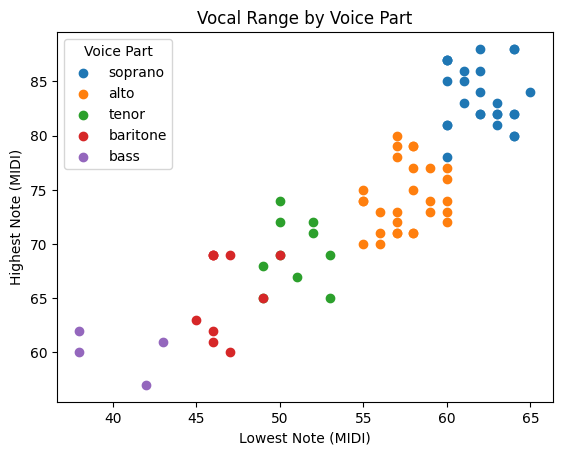

In [137]:
#scatterplot that shows each voice part vs. high & low midi note ranges
#we want clear clustering of voice parts

voice_parts = df['voice'].unique()
colors_map = {'soprano': 'pink', 'alto': 'purple', 'tenor': 'blue', 
              'baritone': 'green', 'bass': 'orange'}

for voice in voice_parts:
    voice_data = df[df['voice'] == voice]
    plt.scatter(voice_data['low_midi'], voice_data['high_midi'], label=voice)

plt.xlabel('Lowest Note (MIDI)', fontsize=10)
plt.ylabel('Highest Note (MIDI)', fontsize=10)
plt.title('Vocal Range by Voice Part')
plt.legend(title='Voice Part')
plt.show()

In this plot, we can see that there are clear clusters between the **low_midi** and **high_midi** points for each voice in each voice class. 
* There is some overlap between the tenor and baritone classes, might be some confusion in the model in the future
* Most points have a clear cluster which means the model generally should not struggle!
* This means that the **low_midi** and **high_midi** variables are strong indicators of the voice classification variable

### Correlation matrix between the different features

            low_midi  high_midi  semitones  nasal_low  nasal_high  airy_low  \
low_midi    1.000000   0.868601   0.061190  -0.178644    0.035284  0.062611   
high_midi   0.868601   1.000000   0.547733  -0.130732    0.012612  0.083633   
semitones   0.061190   0.547733   1.000000   0.038296   -0.034171  0.062748   
nasal_low  -0.178644  -0.130732   0.038296   1.000000    0.114363  0.082286   
nasal_high  0.035284   0.012612  -0.034171   0.114363    1.000000 -0.027143   
airy_low    0.062611   0.083633   0.062748   0.082286   -0.027143  1.000000   
airy_high  -0.201838  -0.116821   0.105478  -0.180433    0.010529  0.119475   

            airy_high  
low_midi    -0.201838  
high_midi   -0.116821  
semitones    0.105478  
nasal_low   -0.180433  
nasal_high   0.010529  
airy_low     0.119475  
airy_high    1.000000  


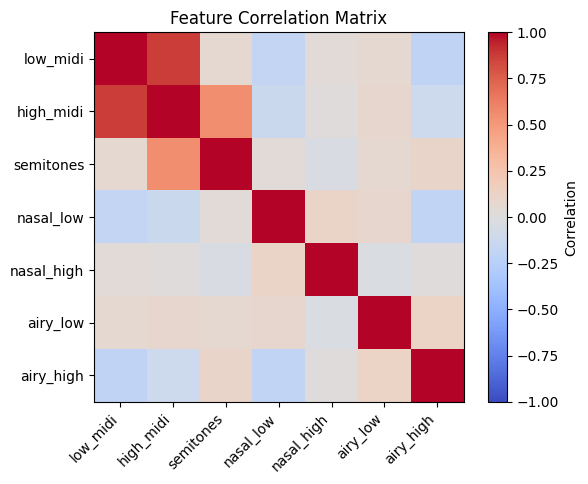

In [185]:
# Correlation between numeric features

numeric_features = ['low_midi', 'high_midi', 'semitones', 
                   'nasal_low', 'nasal_high', 'airy_low', 'airy_high']

#getting corr matrix values
correlation_matrix = df[numeric_features].corr()
print(correlation_matrix)

#heatmap visuals
fig, ax = plt.subplots()
im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(numeric_features)))
ax.set_yticks(np.arange(len(numeric_features)))
ax.set_xticklabels(numeric_features, rotation=45, ha='right')
ax.set_yticklabels(numeric_features)

plt.colorbar(im, ax=ax, label='Correlation')
ax.set_title('Feature Correlation Matrix')
plt.show()


We can use the correlation matrix to see if there are variables that are correlated. If two variables have a high correlation, we can remove one of them to make the model simpler and less complex. 
* **low_midi** and **high_midi** seem to have a high correlation of 0.868 -> we can get rid of one of the two variables
* the next strongest correlation is between **semitones** and **high_midi**, however because this correlation is only moderately strong, we will keep both of these variables. 

# Modeling

We have (very) briefly looked at the variables, the dataset, and the relationship the variables have with each other! We will now build the model based on the insights we just got.

I chose to run a random forest algorithm on this dataset because the random forest algorithm tends to run decently well on smaller datasets (like this) and is very easy to understand. I also usually like to run a feature importance test on the dataset after (did not this time but usually yes)

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#features + classficiation variable
X = df[['low_midi', 'high_midi', 'semitones', 'nasal_low', 'nasal_high', 'airy_low', 'airy_high']]
y = df['voice']

# train/test split 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#random forest
#have to use the weighting to account for the fact that there is very few "basses" in the dataset !!!!!!!!!!!!!!!
# need that statement for model to work !!!!!!!!!!!!!
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

#evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        alto       1.00      0.83      0.91         6
    baritone       0.67      1.00      0.80         2
        bass       1.00      1.00      1.00         1
     soprano       0.83      1.00      0.91         5
       tenor       1.00      0.50      0.67         2

    accuracy                           0.88        16
   macro avg       0.90      0.87      0.86        16
weighted avg       0.91      0.88      0.87        16



* The model originally threw several errors because there was too heavy of a class imbalance in the dataset (not enough basses)
* There are 2 ways to "fix" this issue:
  * Oversampling the minority class to compensate for smaller amounts, while undersampling the majority classes (SMOTE) 
  * Adjusting the class weights to tell the model to pay attention to the smaller classes more -> this is done by changing the penalty score of misclassifying the "minority" classes comparated to the other classes, making the model more sensitive to the minority classes.
* I chose to adjust the weights instead of using SMOTE because I did not want to create synthetic data points that may not generalize and not be representative of real singers; did not want fake data

# Results & Accuracy

As we can see in the classification matrix above, the accuracy was 88% which is decent!